In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
startups = pd.read_excel('P11-1000-Startups.xlsx')

In [ ]:
startups.head()

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC"
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI"


In [8]:
industries = startups.groupby('Industry').size().sort_values(ascending = False)

In [9]:
industries = pd.DataFrame(industries)

In [10]:
#industries.reset_index(inplace=True)
industries.rename(columns={0:'Number'}, inplace=True)


In [ ]:
industries

In [12]:
indus = startups.groupby('Industry').agg({'Employees': [np.mean, np.sum], })

In [13]:
indus.columns = [x + y.capitalize() for x,y in indus.columns.values]

In [14]:
#indus.reset_index(inplace=True)
indus.rename(columns={'EmployeesMean':'Employees_Mean', 'EmployeesSum':'Employees_Sum'}, inplace=True)

In [ ]:
indus

In [16]:
startups['Year Founded'].unique()

array([2006, 2009, 2013, 2012, 2011, 2010, 2007, 2008, 2004, 2000, 2005,
       2003, 2002, 1999, 2014, 2001])

In [17]:
columns = pd.DataFrame(columns = startups.columns.to_list())

In [18]:
columns

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area


In [19]:
industry_grup = startups.groupby('Industry')

In [122]:
for industry, year in industry_grup:
  the_min_year = year.nsmallest(n=1, columns = 'Year Founded')
  columns = columns.append(the_min_year)

In [30]:
columns.to_excel('Columns.xlsx')

In [24]:
indus.reset_index(inplace = True)

In [27]:
indus.head(3)

,Industry,Employees_Mean,Employees_Sum
0,Advertising & Marketing,54.615385,3550
1,Business Products & Services,95.029851,6367
2,Computer Hardware,49.000000,196


In [123]:
columns

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
291,292,Fintax,Advertising & Marketing,Provides a comprehensive lead serivce package ...,2000,12,IL,Chicago,Chicago,NaN
111,112,Keycone,Business Products & Services,Develops online systems that give health insur...,2000,62,CT,Madison,"New Haven-Milford, CT",NaN
56,57,Tindex,Computer Hardware,Provides clients with a streamlined purchasing...,2011,11,MN,Spring Park,Minneapolis,NaN
317,318,Lamcare,Construction,A family-owned and operated electrical contrac...,1999,108,NY,Staten Island,New York City,NaN
245,246,Vivatam,Consumer Products & Services,A home furnishings distribution company that p...,2000,8,NV,Las Vegas,"Las Vegas-Paradise, NV",NaN
322,323,Zumlam,Education,Provides marketing and student enrollment serv...,2003,5,MA,Braintree,Boston,NaN
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",NaN
680,681,Masquerade,Engineering,Provides precision surveying and mapping servi...,2000,690,TX,Austin,Austin,NaN
703,704,Comisbeard,Environmental Services,A multi-media environmental consulting firm th...,2002,35,TX,Houston,Houston,NaN
939,940,Langedprivacy,Financial Services,A financial institution that leverages the pow...,2001,425,TX,Austin,Austin,NaN


In [29]:
indus['Employees_Mean'] = indus['Employees_Mean'].round(0)

In [39]:
x2= indus['Employees_Mean'].to_list()

<BarContainer object of 25 artists>

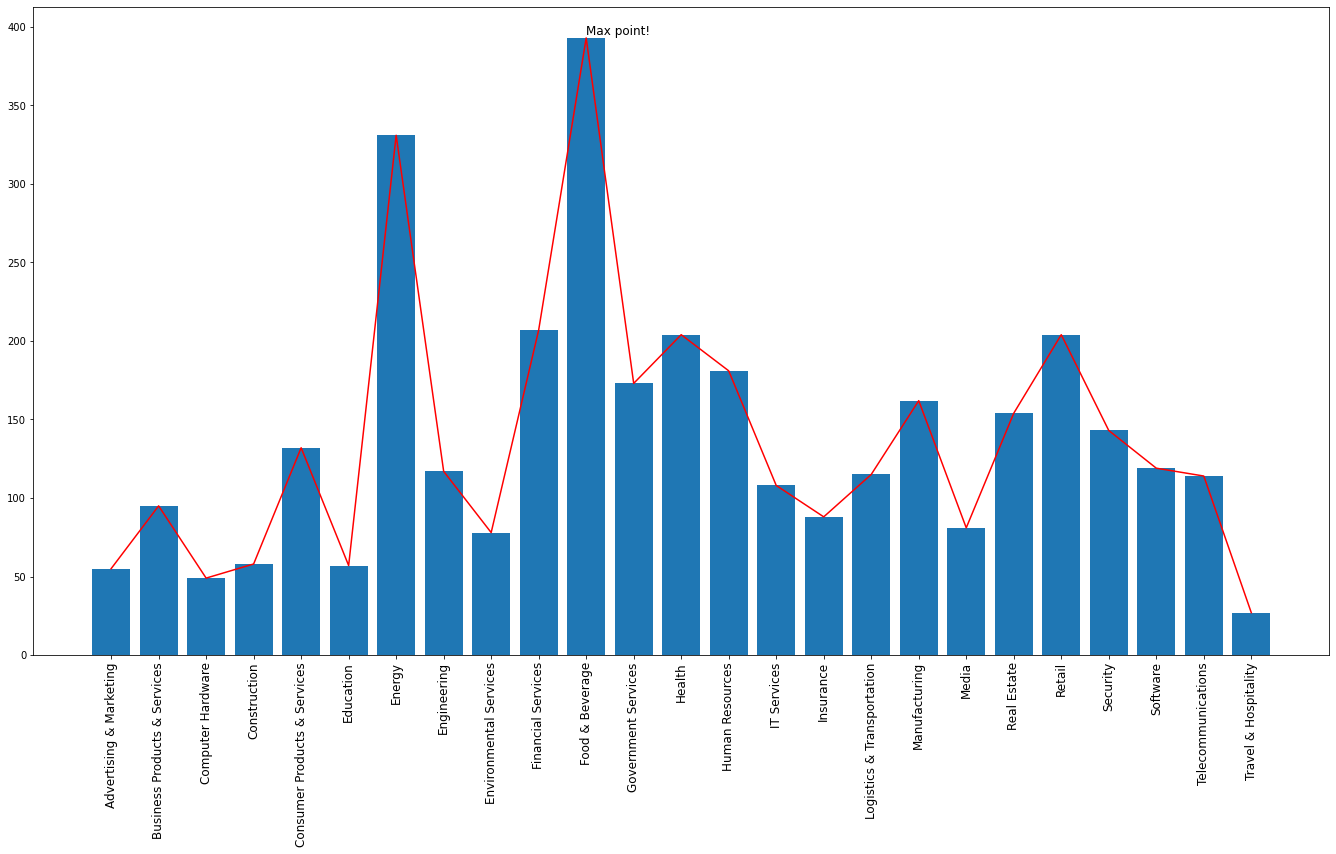

In [127]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])

x1= indus['Industry'].to_list()
x2= indus['Employees_Mean'].to_list()
plt.xticks(rotation=90, size = 12) 
ax.plot(x1,x2, color = 'r')
ax.annotate('Max point!', xy = ('Food & Beverage', 395), size = 12)

plt.bar(x1,x2)


#plt.savefig('Chart_basic.png', dpi = 300)


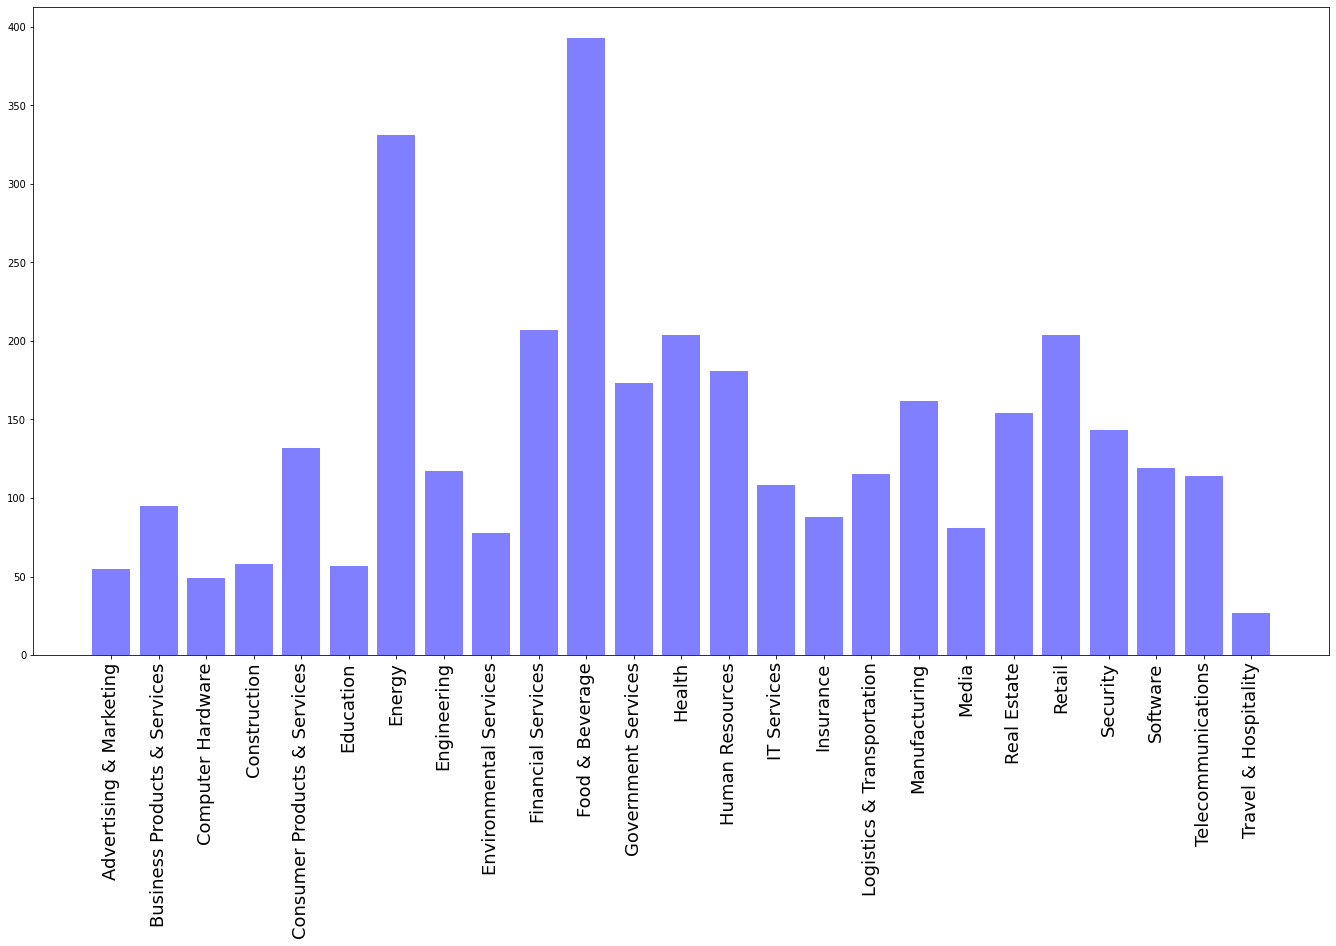

In [121]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_axes([0,0,1,1])
plt.bar(x1,x2, color = 'blue', alpha = 0.5)
plt.xticks(rotation = 90, size = 18)
plt.show()


In [103]:
for x,y in zip(x1,x2):
  print(x,y)

Advertising & Marketing 55.0
Business Products & Services 95.0
Computer Hardware 49.0
Construction 58.0
Consumer Products & Services 132.0
Education 57.0
Energy 331.0
Engineering 117.0
Environmental Services 78.0
Financial Services 207.0
Food & Beverage 393.0
Government Services 173.0
Health 204.0
Human Resources 181.0
IT Services 108.0
Insurance 88.0
Logistics & Transportation 115.0
Manufacturing 162.0
Media 81.0
Real Estate 154.0
Retail 204.0
Security 143.0
Software 119.0
Telecommunications 114.0
Travel & Hospitality 27.0


In [112]:
startups['Avg_no_of_employees'] = startups.groupby('Industry')['Employees'].transform(np.mean).round(0)

In [113]:
startups.head(4)

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,119.0
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,108.0
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,154.0
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",204.0


In [120]:
startups

,ID,Name,Industry,Description,Year Founded,Employees,State,City,Metro Area,Avg_no_of_employees
0,1,Over-Hex,Software,Provides a Web-based CRM tool that allows hosp...,2006,25,TN,Franklin,Nashville,119.0
1,2,Unimattax,IT Services,Helps law firms use Thomson Reuters Elite prac...,2009,36,PA,Newtown Square,Philadelphia,108.0
2,3,Lexila,Real Estate,"Offers investment, construction, residential, ...",2013,38,IL,Tinley Park,Chicago,154.0
3,4,Greenfax,Retail,A Verizon Wireless premium retailer that offer...,2012,320,SC,Greenville,"Newberry, SC",204.0
4,5,Saoace,Energy,An energy efficiency consulting firm that work...,2009,24,WI,New Holstein,"Appleton, WI",331.0
...,...,...,...,...,...,...,...,...,...,...
995,996,Inventtremendous,Construction,A full-service design and build home remodelin...,2009,24,MN,Woodbury,Minneapolis,58.0
996,997,Overviewparrot,Retail,An eco-friendly car cleaning service that clea...,2011,100,TX,Fort Worth,Dallas,204.0
997,998,Belaguerra,IT Services,A global IT services firm specializing exclusi...,2010,140,MI,Troy,Detroit,108.0
998,999,Moviespotter,Education,Provides an e-learning community through virtu...,2012,39,CA,San Rafael,San Francisco,57.0


# Nowa sekcja